# **Laboratorio 8: Una introducción al algoritmo de Descenso de Gradiente**
**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2440** Fundamentos de Machine Learning

**Nombres de los integrantes**


1.  Laura Julieth Carretero Serrano
2.  Juan David Rios Nisperuza

**Número del grupo**

*3*




# **Descenso de Gradiente**

Gradient Descent en inglés o simplemente GD, se trata de un algoritmo de optimización de primer orden con la capacidad de hallar valores mínimos en una amplia gama de problemas de optimización libre (sin restricciones).

**1. Fundamento teórico**

El concepto fundamental que soporta el funcionamiento del algoritmo es el de *gradiente de una función* $\nabla_{f}$. Recordemos de Calculo Vectorial que el gradiente $\nabla_{f}$ de una función $f: \mathbb{R^n} \rightarrow \mathbb{R}$ diferenciable se trata de un vector n-dimensional que apunta en la dirección que máximiza el cambio, la dirección de máximo crecimiento de la función, perpendicular a las curvas de nivel y cuya magnitud representa la pendiente entre dos curvas de nivel en la dirección de máximo crecimiento (es mayor conforme más cerca entre sí estan las curvas de nivel es decir, entre mayor es el cambio de altura entre dos puntos). Bajo estas propiedades, si recorremos la función desde un punto arbitrario en su dominio siguiendo la dirección del gradiente, vamos a construir el camino más corto que conduce al valor máximo de la función.

**2. Algoritmo de Descenso de Gradiente**

A partir de estas propiedades del gradiente, el algoritmo de Descenso de Gradiente propone hallar el mínimo de una función $f: \mathbb{R^n} \rightarrow \mathbb{R}$ diferenciable, recorriendo la función en la dirección opuesta a la que apunta el gradiente (es decir, la dirección de mínimo crecimiento), de esta forma podemos construir un camino, el más corto, que conduce al valor mínimo de la función:

\begin{align*}
x_{n+1} = x_{n} - \nabla_f(x_{n})
\end{align*}

Este algoritmo nos conduce inevitablemente al mínimo de la función. No obstante, dependiendo el comportamiento de la función, el gradiente puede ser inestable (variar de valores muy grandes a muy pequeños) lo que dificulta al algoritmo converger de forma eficiente al mínimo. Por esta razón resulta conveniente agregar un factor que escale el valor del gradiente y que permita controlar la longitud en cada paso del recorrido:

\begin{align*}
x_{n+1} = x_{n} - \alpha \nabla_f(x_{n})
\end{align*}

El factor $\alpha$ es un número real positivo que se conoce como *tasa de aprendizaje (learning rate en inglés)* y es un hiperparámetro crítico en el algoritmo, puesto que determina su velocidad de convergencia, la estabilidad del proceso y puede afectar el valor mínimo hallado.

Veamos paso a paso como opera el algoritmo:

1. **Iniciamos desde un punto de partida ($x_0$)**: Este punto inicial es arbitrario, un punto cualquiera en el dominio de la función. Su elección se hace crítica cuando la función no es convexa o tiene varios mínimos locales.

2. **Calculamos el gradiente en este punto $\nabla_f(x_{0})$ y tomamos la dirección opuesta**: Calculamos el vector gradiente de la función objetivo $\nabla_{f}$ y lo evaluamos en el punto de partida $\nabla_{f}(x_{0})$. Este vector apunta en la dirección de máximo crecimiento así que tomamos la dirección opuesta para dirigirnos al mínimo $-\nabla_{f}(x_{0})$.

3. **Elegimos una tasa de aprendizaje adecuada ($\alpha$)**: Su valor es muy crítico: un valor de $\alpha$ muy pequeño implica una convergencia muy lenta, por otro lado, un valor de $\alpha$ muy grande podría saltar muchos detalles de la geometría de la función y nos haría perder el rumbo o incluso pasar por encima del mínimo, haciendo que el algoritmo nunca converja.

4. **Hallamos un nuevo punto inicial ($x_1$)**: Al tomar la diferencia $x_0 - \alpha \nabla_{f}(x_{0})$ damos un paso en dirección al mínimo que nos lleva a un nuevo punto $x_1$ que se encuentra más cerca de éste valor:

\begin{align*}
x_{1} = x_{0} - \alpha \nabla_f(x_{0})
\end{align*}

5. **Iteramos**: Tomando $x_{1}$ como nuevo punto inicial repetimos el proceso anterior, que continua siguiendo el algoritmo:

\begin{align*}
x_{n+1} = x_{n} - \alpha \nabla_f(x_{n})
\end{align*}

Hasta que se observa que la variación entre cada punto nuevo se encuentra por debajo de una tolerancia definida, allí el método finaliza y tomamos el último valor $x_{n+1}$ como el mínimo de la función.


A continuación se presenta un pseudoalgoritmo para el método de Descenso de Gradiente, donde $x[k]$ es un vector en $R^n$ que corresponde al resultado de la iteración $k$, $\nabla_f$ es el gradiente de la función y $\alpha$ es la tasa de aprendizaje.

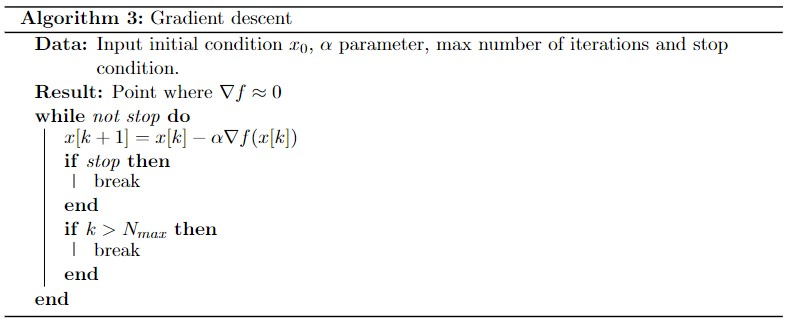

**1.1 Ejercicios**


- Se requiere resolver el siguiente problema de optimización libre:


  $$\min_x f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x}+B^T\mathbf{x}+C,   
  x \in R^2$$



- Donde los valores constantes tienen los siguientes valores:

$$
  Q = \begin{pmatrix}
  1 & 3 \\
  -2 & 1
  \end{pmatrix},
$$
$$
  B = \begin{pmatrix}
  1/2 \\
  1
  \end{pmatrix},
$$
$$
  C= 5,
$$
$$
  x= [x_1, x_2]^T
$$





In [14]:
import numpy as np  
import sympy as sym 
import matplotlib.pyplot as plt 

# Definimos las variables simbólicas x1 y x2, que representan los componentes del vector x
x1, x2 = sym.symbols("x1, x2", real=True)

# Creamos el vector de variables x
x = np.array([x1, x2])

# Definimos la matriz Q que representa la parte cuadrática de la función objetivo
Q = np.array([[1, 3],  # Primera fila de la matriz Q
              [-2, 1]]) # Segunda fila de la matriz Q

# Definimos el vector B que representa los coeficientes lineales
B = np.array([1/2, 1])

# Definimos la constante C en la función objetivo
C = 5

# Construimos la función objetivo f(x) en forma simbólica
# La expresión es de la forma: (1/2) * x^T * Q * x + B^T * x + C
f = 0.5 * x @ Q @ x + B @ x + C

# Convertimos la función simbólica en una función numérica evaluable
f_num = sym.lambdify([x1, x2], f)  # Convierte f en una función evaluable para valores numéricos


1. ¿Cúal es la finalidad de encontrar un punto donde el gradiente de una función objetivo se anule en un contexto de optimización?

La finalidad de encontrar un punto donde el gradiente se anule es identificar un punto estacionario de la función, lo que significa que en ese lugar la función no presenta una dirección inmediata de aumento o disminución. Esto cumple una condición necesaria para que dicho punto sea un mínimo, un máximo o incluso un punto de silla. En optimización, detectar estos puntos críticos es importante para delimitar posibles soluciones óptimas y, posteriormente, se pueden emplear otros criterios, como el análisis del Hessiano, para confirmar la naturaleza del punto encontrado.

2. Determine si el problema es convexo o no, en caso de serlo, calcule teóricamente el minimizador.

In [15]:
import sympy as sym  

def DerivativeMatrix(function, variables):
    """
    Calcula la matriz Jacobiana de una función vectorial respecto a un conjunto de variables.
    """
    m = len(variables)  
    n = len(function)  
    matrix = sym.zeros(n, m)  

    for fun in range(n):
        for variable in range(m):
            f = function[fun]  
            v = variables[variable]  
            matrix[fun, variable] = f.diff(v)  

    return matrix  


x1, x2 = sym.symbols("x1 x2", real=True)  

def CriticalPoints(function):
    """
    Calcula los puntos críticos de una función escalar de dos variables resolviendo su gradiente igualado a cero.
    """
    gradient = DerivativeMatrix([function], [x1, x2])  
    return sym.solve([gradient[0], gradient[1]], [x1, x2])  

In [16]:
CriticalPoints(f)

{x1: 0.0, x2: -1.00000000000000}

3. Implemente una función que reciba como argumento un punto $[x_1, x_2]^T$ y retorne el valor numérico del gradiente calculado en ese punto, para ello calcule teóricamente el gradiente de la forma cuadrática y evalúelo en el argumento ingresado.

In [17]:
def gradient(p):
    """
    Calcula el gradiente de la función f en un punto dado.
    """
    df_dx1 = sym.lambdify([x1, x2], sym.diff(f, x1))(p[0], p[1])
    df_dx2 = sym.lambdify([x1, x2], sym.diff(f, x2))(p[0], p[1])
    return np.array([df_dx1, df_dx2])

4. Implemente una función que reciba como argumento un punto inicial $X_0$, un parámetro $\alpha > 0$ , un número máximo de pasos $N$ y un parámetro $\epsilon > 0$ que defina la tolerancia para la solución del algoritmo:  $||x[k+1]-x[k]||_2 \leq ϵ$, así el algoritmo de Descenso de Gradiente converge si $x[k+1]$ es muy cercano a $x[k]$. La función debe retornar un diccionario con 4 elementos: el historial de los puntos por donde pasa el algoritmo (es decir, todos sus puntos $x[k]$), la función evaluada en cada punto $f(x[k])$, el punto $x_k$ que corresponde al valor mínimo y un booleano que indique si se superó el número máximo de pasos permitido (*True* si se superan los pasos, *False* en caso contrario).  

In [18]:
def gradient_descent1(x0, alpha, N, epsilon):
    """
    Implementa el algoritmo de Descenso de Gradiente con un criterio de parada basado en la tolerancia ε.
    
    Parámetros:
    - x0: Punto inicial.
    - alpha: Tasa de aprendizaje (paso del descenso).
    - N: Número máximo de iteraciones.
    - epsilon: Tolerancia para la convergencia.

    Retorna:
    - history_x: Historial de puntos visitados por el algoritmo.
    - history_f: Valores de la función evaluada en cada punto.
    - x0_min: Punto donde se alcanza el mínimo estimado.
    - stop: Indica si el número máximo de iteraciones fue superado (True) o no (False).
    """
    history_x = []
    history_f = []

    stop = True
    
    for i in range(N):
        x0_old = x0.copy()
        x0 = x0_old - alpha * gradient(x0_old)

        history_x.append(list(x0))
        history_f.append(f_num(x0[0], x0[1]))

        if np.linalg.norm(x0 - x0_old) <= epsilon:
            stop = False
            break

    x0_min = x0
    
    history_x = np.array(history_x)
    history_f = np.array(history_f)

    return history_x, history_f, x0_min, stop


5. Implemente una función con la misma estructura de la función del punto anterior pero que tome como condición de parada que $||∇f(x[k])||_2≤\epsilon$, es decir, el algoritmo se debe detener si la norma del gradiente es menor a la tolerancia definida. ¿Que implicaciones tiene esta nueva condición en el funcionamiento del algoritmo respecto a la condición del ejercicio anterior?

In [19]:
def gradient_descent2(x0, alpha, N, epsilon):
    """
    Implementa el algoritmo de Descenso de Gradiente con un criterio de parada basado en la norma del gradiente.

    Parámetros:
    - x0: Punto inicial.
    - alpha: Tasa de aprendizaje (paso del descenso).
    - N: Número máximo de iteraciones.
    - epsilon: Tolerancia para la convergencia.

    Retorna:
    - history_x: Historial de puntos visitados por el algoritmo.
    - history_f: Valores de la función evaluada en cada punto.
    - x0_min: Punto donde se alcanza el mínimo estimado.
    - stop: Indica si el número máximo de iteraciones fue superado (True) o no (False).
    """
    history_x = []
    history_f = []

    stop = True
    
    for i in range(N):
        x0_old = x0.copy()
        x0 = x0_old - alpha * gradient(x0_old)

        history_x.append(list(x0))
        history_f.append(f_num(x0[0], x0[1]))

        if np.linalg.norm(gradient(x0)) <= epsilon:
            stop = False
            break

    x0_min = x0
    
    history_x = np.array(history_x)
    history_f = np.array(history_f)

    return history_x, history_f, x0_min, stop

La nueva condición de parada hace que el algoritmo solo se detenga cuando la pendiente sea casi cero, asegurando que realmente se llegue a un punto crítico. Esto es más preciso porque evita que el algoritmo se detenga solo porque el cambio entre pasos sea pequeño, lo que podría pasar en zonas donde la función varía lentamente. Sin embargo, también puede hacer que el proceso tarde más, porque en algunas funciones el gradiente disminuye muy lentamente, haciendo que el algoritmo siga iterando más tiempo antes de detenerse.

6. Evalúe las funciones de los puntos 4 y 5 para calcular el posible minimizador local de la función cuadrática suministrada tomando los siguientes parámetros:

  - $\epsilon = 0.1$
  - $n = 100$
  - $X_0 = [2,2]^T$

  Ambas funciones deben ser invocadas para tres valores distintos de la tasa de aprendizaje, $\alpha = [0.1, 0.5, 0.8]$

Función del punto 4

In [20]:
history_x1, history_f1, x0_min1, _ = gradient_descent1([2,2],0.1,100,0.1)

gradient_descent1([2,2],0.1,100,0.1)

(array([[ 1.65      ,  1.6       ],
        [ 1.355     ,  1.2575    ],
        [ 1.106625  ,  0.964     ],
        [ 0.8977625 ,  0.71226875],
        [ 0.72237281,  0.49615375],
        [ 0.57532784,  0.31041973],
        [ 0.45227407,  0.15061137],
        [ 0.3495161 ,  0.01293653],
        [ 0.26391766, -0.10583293],
        [ 0.19281754, -0.20844552],
        [ 0.13395806, -0.29724184],
        [ 0.08542435, -0.37421556]]),
 array([11.38625   ,  9.49562188,  8.1276632 ,  7.13752623,  6.42053966,
         5.90106148,  5.52442502,  5.25111977,  5.05258688,  4.90818134,
         4.80297695,  4.72618035]),
 array([ 0.08542435, -0.37421556]),
 False)

In [21]:
history_x2, history_f2, x0_min2, _ = gradient_descent1([2,2],0.5,100,0.1)

gradient_descent1([2,2],0.5,100,0.1)

(array([[ 0.25      ,  0.        ],
        [-0.125     , -0.5625    ],
        [-0.171875  , -0.75      ],
        [-0.1484375 , -0.83203125]]),
 array([5.15625   , 4.57617188, 4.52453613, 4.51265717]),
 array([-0.1484375 , -0.83203125]),
 False)

In [22]:
history_x3, history_f3, x0_min3, _ = gradient_descent1([2,2],0.8,100,0.1)

gradient_descent1([2,2],0.8,100,0.1)

(array([[-0.8   , -1.2   ],
        [-0.08  , -0.72  ],
        [-0.128 , -0.912 ],
        [-0.0608, -0.9312]]),
 array([4.92      , 4.5312    , 4.506432  , 4.50212352]),
 array([-0.0608, -0.9312]),
 False)

Función punto 5

In [23]:
history_x4, history_f4, x0_min4, _ = gradient_descent2([2,2],0.1,100,0.1)

gradient_descent2([2,2],0.1,100,0.1)

(array([[ 1.65      ,  1.6       ],
        [ 1.355     ,  1.2575    ],
        [ 1.106625  ,  0.964     ],
        [ 0.8977625 ,  0.71226875],
        [ 0.72237281,  0.49615375],
        [ 0.57532784,  0.31041973],
        [ 0.45227407,  0.15061137],
        [ 0.3495161 ,  0.01293653],
        [ 0.26391766, -0.10583293],
        [ 0.19281754, -0.20844552],
        [ 0.13395806, -0.29724184],
        [ 0.08542435, -0.37421556],
        [ 0.04559269, -0.44106522],
        [ 0.01308668, -0.49923834],
        [-0.01326007, -0.54996884],
        [-0.03443562, -0.59430895],
        [-0.05127661, -0.63315627],
        [-0.06449113, -0.66727682],
        [-0.07467818, -0.69732458],
        [-0.08234413, -0.72385821],
        [-0.08791681, -0.74735518],
        [-0.09175737, -0.76822382],
        [-0.09417044, -0.78681357],
        [-0.09541272, -0.80342369],
        [-0.09570026, -0.81831069],
        [-0.0952147 , -0.83169461],
        [-0.0941085 , -0.84376441],
        [-0.09250943, -0.854

In [24]:
history_x5, history_f5, x0_min5, _ = gradient_descent2([2,2],0.5,100,0.1)

gradient_descent2([2,2],0.5,100,0.1)

(array([[ 0.25      ,  0.        ],
        [-0.125     , -0.5625    ],
        [-0.171875  , -0.75      ],
        [-0.1484375 , -0.83203125],
        [-0.11621094, -0.87890625]]),
 array([5.15625   , 4.57617188, 4.52453613, 4.51265717, 4.50704813]),
 array([-0.11621094, -0.87890625]),
 False)

In [25]:
history_x6, history_f6, x0_min6, _ = gradient_descent2([2,2],0.8,100,0.1)

gradient_descent2([2,2],0.8,100,0.1)

(array([[-0.8  , -1.2  ],
        [-0.08 , -0.72 ],
        [-0.128, -0.912]]),
 array([4.92    , 4.5312  , 4.506432]),
 array([-0.128, -0.912]),
 False)

7. En un figura de 2 columnas y 3 filas grafique las curvas de nivel de la función cuadrática suministrada y las trayectorias de búsqueda del mínimo que obtuvo como resultado en el punto anterior. Agregue un título relacionado así como etiquetas en los ejes.

  **Hint:** Cada uno de sus subplots debería lucir similar al que se presenta a continuación:

  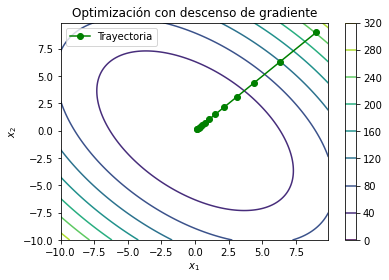

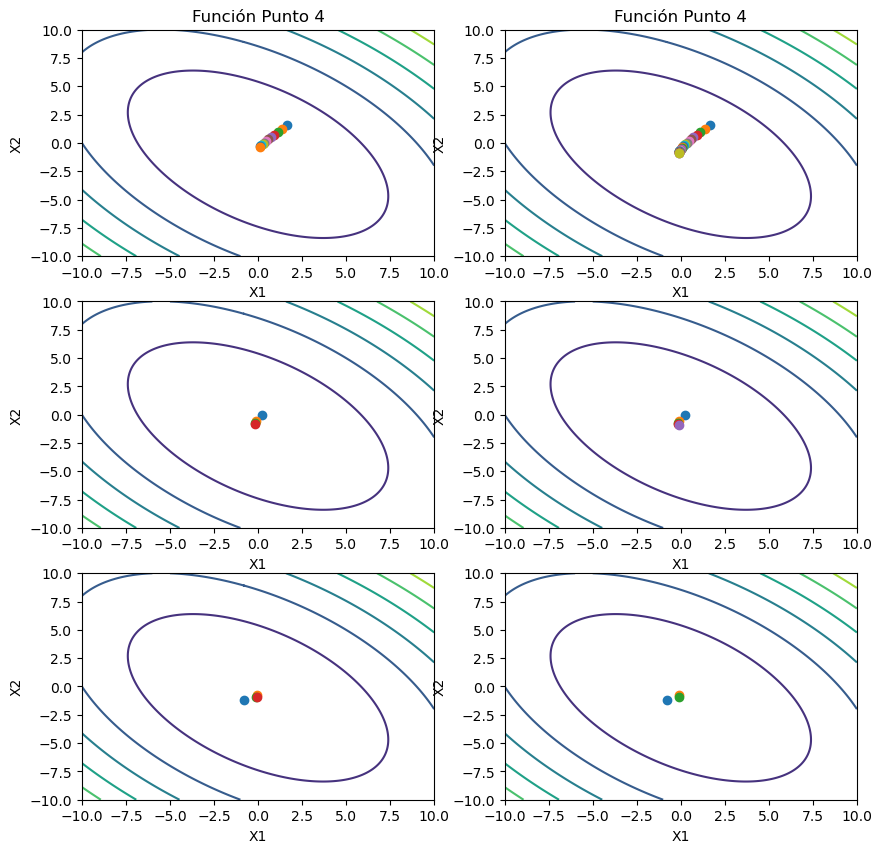

In [26]:
# Crear una figura con una cuadrícula de 3 filas y 2 columnas
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

# Definir el rango de valores para las variables X1 y X2
x1_ = np.linspace(-10, 10, 1000)
x2_ = np.linspace(-10, 10, 1000)

# Crear una malla de valores para evaluar la función en el espacio bidimensional
X1, X2 = np.meshgrid(x1_, x2_)
F = f_num(X1, X2)  # Evaluar la función en toda la malla

# Graficar el contorno de la función en la primera subgráfica (fila 1, columna 1)
ax[0][0].contour(X1, X2, F)
ax[0][0].set_xlabel('X1')
ax[0][0].set_ylabel('X2')
ax[0][0].set_title('Función Punto 4')

# Agregar los puntos del historial de la primera ejecución del descenso de gradiente
for i in history_x1:
    ax[0][0].scatter(i[0], i[1])

# Segunda subgráfica (fila 2, columna 1)
ax[1][0].contour(X1, X2, F)
ax[1][0].set_xlabel('X1')
ax[1][0].set_ylabel('X2')

# Agregar los puntos del historial de la segunda ejecución del descenso de gradiente
for i in history_x2:
    ax[1][0].scatter(i[0], i[1])

# Tercera subgráfica (fila 3, columna 1)
ax[2][0].contour(X1, X2, F)
ax[2][0].set_xlabel('X1')
ax[2][0].set_ylabel('X2')

# Agregar los puntos del historial de la tercera ejecución del descenso de gradiente
for i in history_x3:
    ax[2][0].scatter(i[0], i[1])

# Cuarta subgráfica (fila 1, columna 2)
ax[0][1].contour(X1, X2, F)
ax[0][1].set_xlabel('X1')
ax[0][1].set_ylabel('X2')
ax[0][1].set_title('Función Punto 4')

# Agregar los puntos del historial de la cuarta ejecución del descenso de gradiente
for i in history_x4:
    ax[0][1].scatter(i[0], i[1])

# Quinta subgráfica (fila 2, columna 2)
ax[1][1].contour(X1, X2, F)
ax[1][1].set_xlabel('X1')
ax[1][1].set_ylabel('X2')

# Agregar los puntos del historial de la quinta ejecución del descenso de gradiente
for i in history_x5:
    ax[1][1].scatter(i[0], i[1])

# Sexta subgráfica (fila 3, columna 2)
ax[2][1].contour(X1, X2, F)
ax[2][1].set_xlabel('X1')
ax[2][1].set_ylabel('X2')

# Agregar los puntos del historial de la sexta ejecución del descenso de gradiente
for i in history_x6:
    ax[2][1].scatter(i[0], i[1])


### **8. Responda las siguientes preguntas:**  

- **¿Qué valor de $\alpha$ considera que fue el mejor? ¿Por qué?**  

  El mejor valor de $\alpha$ fue $0.1$, ya que permitió que el descenso de gradiente convergiera de manera estable hacia el mínimo. En los resultados observados, con $\alpha = 0.1$, los valores se acercan progresivamente al óptimo sin grandes oscilaciones ni divergencias.  

- **¿Por qué cree que un valor de $\alpha$ muy grande no permite alcanzar la convergencia?**  

  Un valor de $\alpha$ demasiado grande hace que los pasos del algoritmo sean muy largos, lo que puede provocar que el método "salte" sobre el mínimo en cada iteración sin llegar a estabilizarse. Esto puede generar oscilaciones o incluso hacer que el algoritmo diverja, alejándose del óptimo en lugar de acercarse.  

- **¿Qué condición de parada entre las dos que se implementaron considera que es mejor en este caso? ¿Por qué?**  

  La condición basada en la norma del gradiente $||\nabla f(x_k)||_2 \leq \epsilon$ es más efectiva, ya que garantiza que el algoritmo se detenga solo cuando el gradiente sea suficientemente pequeño. Esto asegura que el punto encontrado realmente esté cerca de un óptimo. En cambio, la condición basada en la diferencia entre iteraciones, $||x_{k+1} - x_k||_2 \leq \epsilon$, puede hacer que el algoritmo se detenga antes de tiempo en regiones con gradientes suaves, sin haber alcanzado un verdadero mínimo.  

- **¿Qué pasaría si se usa el algoritmo de Descenso de Gradiente con una forma cuadrática no convexa?**  

  Si la función no es convexa, el descenso de gradiente podría quedar atrapado en mínimos locales en lugar de encontrar el mínimo global. Además, si la función tiene regiones planas o múltiples valles, el algoritmo puede tardar más en converger o incluso oscilar sin llegar a un punto estable.
